# AST Demo (with inline Graphviz)

Loads an example SQL file, builds the AST, and renders it inline as a Graphviz image (PNG/SVG if Graphviz is installed).


In [44]:
import sys
import subprocess
import shutil
from pathlib import Path
from IPython.display import Image, display

# Ensure repo root and src are on path (works when __file__ is undefined in notebooks)
try:
    ROOT = Path(__file__).resolve().parents[1]
except NameError:
    ROOT = Path.cwd().resolve().parents[0]
SRC = ROOT / 'src'
for p in (ROOT, SRC):
    sp = str(p)
    if sp not in sys.path:
        sys.path.insert(0, sp)

from sql_compiler import SQLCompiler
from sql_ast.graph import ast_to_dot
try:
    from graphviz import Source
    HAS_GRAPHVIZ = True
except ImportError:
    HAS_GRAPHVIZ = False
    print('graphviz python package missing; will fall back to the `dot` binary if available.')

DOT_BIN = shutil.which('dot')
if not DOT_BIN:
    print('Graphviz `dot` binary not found on PATH; install graphviz to render images inline.')


In [45]:
# Use an example test SQL file
file_path = ROOT / 'examples' / 'test7.sql'
sql = file_path.read_text(encoding='utf-8')
print(sql)


IF not exists (select * from sysobjects where name='TRACKING' and xtype='U')

BEGIN

CREATE TABLE dbo.TRACKING (
    TRACKING_KEY INT NOT NULL,
    C_KEY INT NULL,
    USER_KEY INT NULL,
    ACTION_DATETIME DATE NULL,
    SOURCE NVARCHAR(20) NULL,
    [ACTION] NVARCHAR(20) NULL,
    [DESC] NVARCHAR(100) NULL,
    CONSTRAINT PK_TRACKING
        PRIMARY KEY CLUSTERED (TRACKING_KEY)
)

INSERT INTO TRACKING (
        [TRACKING_KEY],
        [C_KEY],
        [USER_KEY],
        [ACTION_DATETIME],
        [SOURCE],
        [ACTION],
        [DESC]
    )
    VALUES (
        -1,
        -1,   
        -1,  
        NULL,
        '-',
        'OTHER',
        '-' 
    )

END
GO


INSERT INTO TRACKING
(
    [TRACKING_KEY],
    C_KEY,
    USER_KEY,
    ACTION_DATETIME,
    [SOURCE],
    [ACTION],
    [DESC]
)
SELECT
    [STG_TRACKING].[TRACKING_KEY],
    [STG_TRACKING].[C_KEY],
    [STG_TRACKING].USER_KEY,
    [STG_TRACKING].ACTION_DATETIME,
    [STG_TRACKING].SOURCE,
    [STG_TRACKING].[ACTION]

In [46]:
ast = SQLCompiler.run_file(str(file_path), show_tokens=False, show_parse_tree=False)



===== SQL INPUT (/home/mega/projects/forth-year/compiler/antlr4-sql/examples/test7.sql) =====
IF not exists (select * from sysobjects where name='TRACKING' and xtype='U')

BEGIN

CREATE TABLE dbo.TRACKING (
    TRACKING_KEY INT NOT NULL,
    C_KEY INT NULL,
    USER_KEY INT NULL,
    ACTION_DATETIME DATE NULL,
    SOURCE NVARCHAR(20) NULL,
    [ACTION] NVARCHAR(20) NULL,
    [DESC] NVARCHAR(100) NULL,
    CONSTRAINT PK_TRACKING
        PRIMARY KEY CLUSTERED (TRACKING_KEY)
)

INSERT INTO TRACKING (
        [TRACKING_KEY],
        [C_KEY],
        [USER_KEY],
        [ACTION_DATETIME],
        [SOURCE],
        [ACTION],
        [DESC]
    )
    VALUES (
        -1,
        -1,   
        -1,  
        NULL,
        '-',
        'OTHER',
        '-' 
    )

END
GO


INSERT INTO TRACKING
(
    [TRACKING_KEY],
    C_KEY,
    USER_KEY,
    ACTION_DATETIME,
    [SOURCE],
    [ACTION],
    [DESC]
)
SELECT
    [STG_TRACKING].[TRACKING_KEY],
    [STG_TRACKING].[C_KEY],
    [STG_TRACKING].USER_

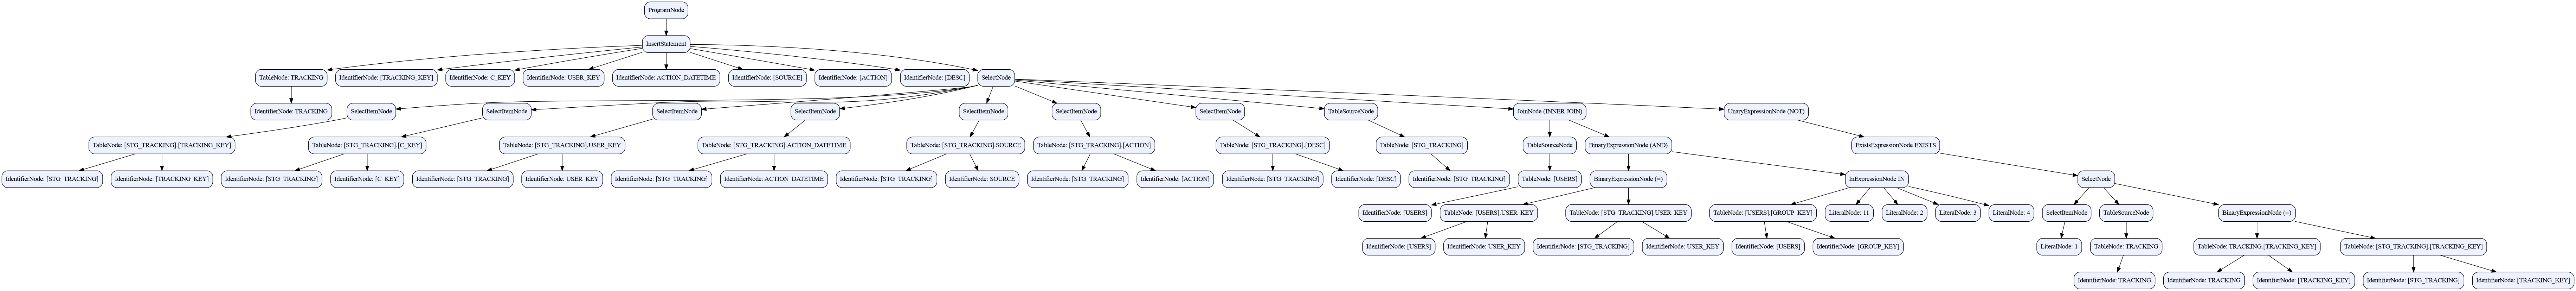

In [48]:
dot = ast_to_dot(ast)
if HAS_GRAPHVIZ:
    src = Source(dot, format='png')
    png_bytes = src.pipe()
    display(Image(data=png_bytes))
else:
    print('Graphviz render unavailable; install graphviz package and binaries to see the image inline.')
